In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('q1_dataset.csv')

In [54]:
def H(p):
    if p == 0 or p == 1:
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [55]:
def p(df, label):
    return np.sum(df[label] == True)/df.shape[0]

In [56]:
def IG(df, a):
    return H(p(df,'target')) - p(df,a)*H(p(df[df[a] == True], 'target')) - (1-p(df,a))*H(p(df[df[a] == False], 'target'))

In [92]:
a='feat4'

print(df[((df[a]==True) & (df['feat3']==False) & (df['feat1']==True))])
print()
print(df[((df[a]==False) & (df['feat3']==False) & (df['feat1']==True))])
print()
print(IG(df[(df['feat3']==False) & (df['feat1']==True)], a) - H(p(df[(df['feat3']==False) & (df['feat1']==True)], 'target')))

   feat1  feat2  feat3  feat4  target
2   True   True  False   True    True
3   True  False  False   True   False

   feat1  feat2  feat3  feat4  target
4   True  False  False  False   False

-0.6666666666666666


In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

h = DecisionTreeClassifier(criterion='entropy')

In [58]:
h.fit(df[df.columns[:-1]], df['target'])

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.875, 'x[2] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.375, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

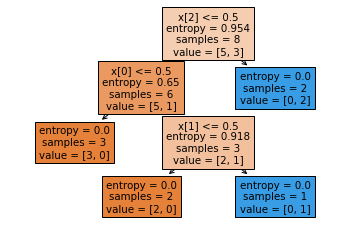

In [59]:
plot_tree(h, filled=True)

In [60]:
df1 = df[['feat1','feat2','target']]

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5, 'x[0] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

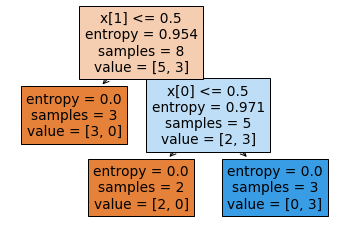

In [61]:
h1 = DecisionTreeClassifier(criterion='entropy')
h1.fit(df1[df1.columns[:-1]], df1['target'])
plot_tree(h1, filled=True)

[Text(0.6, 0.8333333333333334, 'x[2] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.5, 'x[1] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

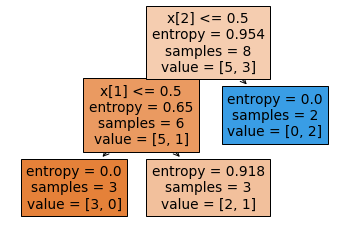

In [94]:
h2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
h2.fit(df[df.columns[:-1]], df['target'])
plot_tree(h2, filled=True)